Problem : Customer Segmentation by clustering

Dataset : whole sale customer data

ML model : Heirarchical Clustering and K-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Heirarchical Clustering

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Wholesale_customers_data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.shape

(440, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
#Normalizing the Data as Clustering is factored upon Weighted distances of datapoints.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
df = pd.DataFrame(data_scaled, columns = data.columns)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


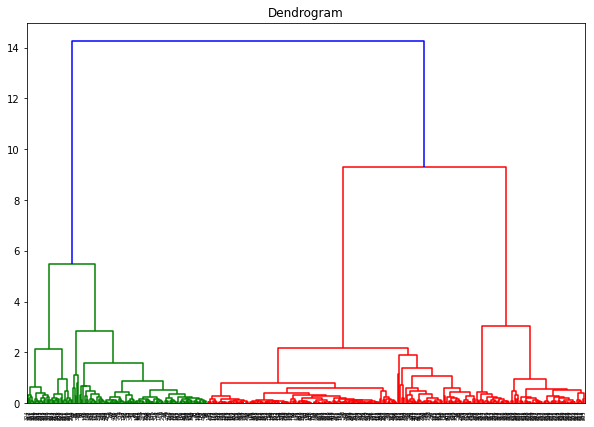

In [6]:
#dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

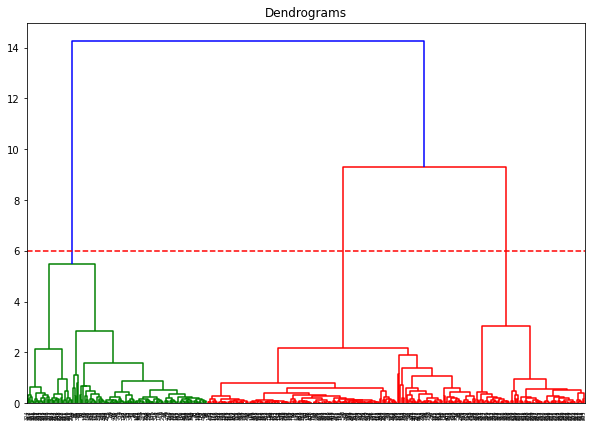

In [7]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [8]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

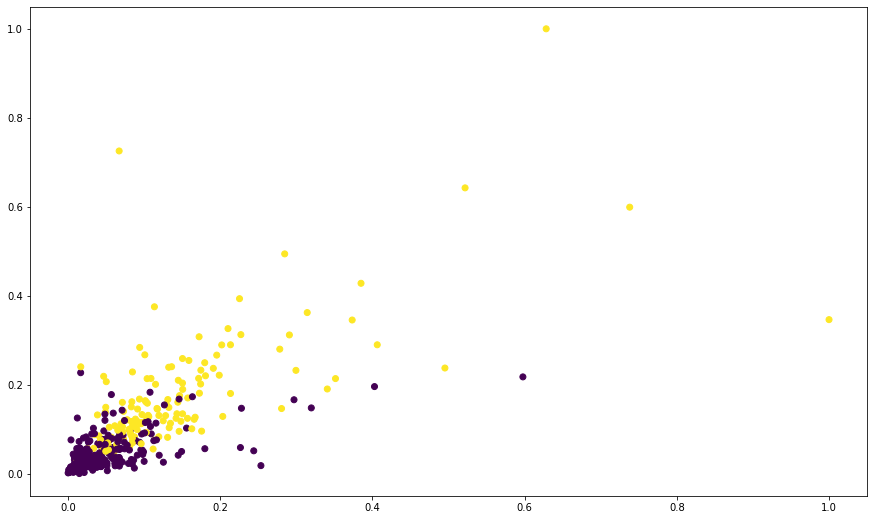

In [9]:
plt.figure(figsize=(15, 9))
plt.scatter(df['Milk'], df['Grocery'], c=cluster.labels_)

In [10]:
from sklearn.preprocessing import normalize
data_scaled2 = normalize(data)
df_new = pd.DataFrame(data_scaled2, columns = data.columns)
df_new.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


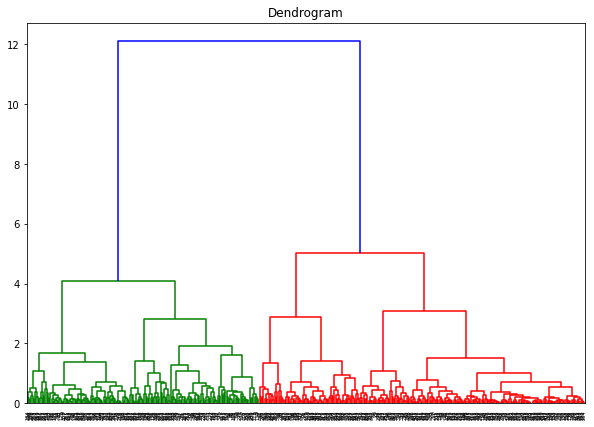

In [11]:
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(df_new, method='ward'))

In [12]:
cluster_new = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_new.fit_predict(df_new)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

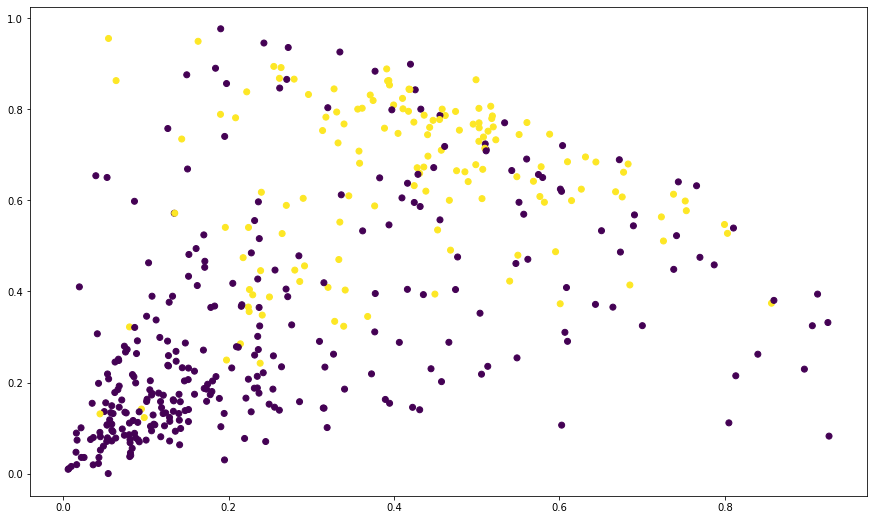

In [13]:
plt.figure(figsize = (15, 9))
plt.scatter(df_new['Milk'], df_new['Grocery'], c=cluster.labels_)

Upon different cases of normalization, the clusters plotted differed in distribution/spread

# K-Means Clustering

In [14]:
!pip install kneed

In [15]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs #useful when working with clusters
from sklearn.cluster import KMeans

In [16]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [17]:
X[:5] #Features

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324],
       [ 1.15521298,  5.09961887],
       [-1.01861632,  7.81491465],
       [ 1.27135141,  1.89254207]])

In [18]:
y[:5] #target_value

array([1, 3, 0, 3, 1])

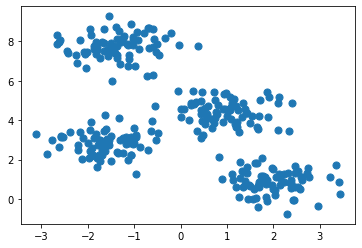

In [19]:
plt.scatter(X[:, 0], X[:, 1], s=50)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #scaling because of the same reasons as mentioned in Hierarchical Clustering

# Determining the optimum number of clusters to be split

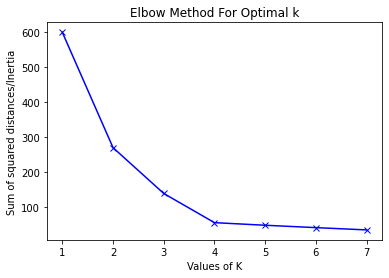

In [23]:
# Using Elbow Method
Sum_of_squared_distances = []
K = range(1,8)
for index in K :
 kmeans = KMeans(n_clusters=index)
 kmeans.fit(X_scaled)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

0.4768094347435569
0.5711587835183477
0.6569234398199433
0.581073283085342
0.5056876381491019
0.4523932508876796
0.3974468527440503


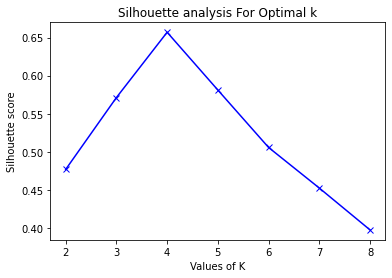

In [28]:
#Using Silhoutte Method
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:

 
 # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X_scaled)
  cluster_labels = kmeans.labels_
 
 # silhouette score
  silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))
  print(silhouette_score(X_scaled, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

From using Elbow and Silhouette method, we find out that the optimal number of clusters are 4.

In [29]:
kmeans_new = KMeans(
    init = 'random',
    n_clusters = 4,
    n_init = 10,
    max_iter = 300,
    random_state = 0
)

In [44]:
kmeans_new.fit(X_scaled)
kmeans_new.inertia_ #gives the lowest SSE value
#SSE -> sum of squared distance from the centroid of the cluster to each member of the cluster.

56.0247705750995

In [45]:
kmeans_new.cluster_centers_ #locations of the centroid

array([[-0.83691948,  1.46193015],
       [ 0.58536699,  0.17425154],
       [ 1.21774671, -1.19712077],
       [-0.96619422, -0.43906093]])

In [46]:
#The number of iterations required to converge
kmeans_new.n_iter_

6

In [47]:
y_pred = kmeans_new.predict(X_scaled)
y_pred[:5]

array([2, 0, 1, 0, 2], dtype=int32)

In [48]:
y_true = kmeans_new.labels_
y_true[:5]

array([2, 0, 1, 0, 2], dtype=int32)

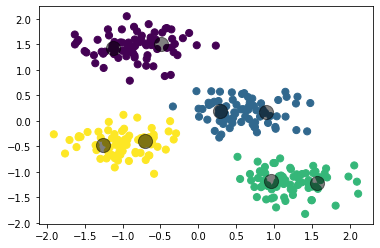

In [49]:
#visualizing the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);